In [2]:
#importing the libraries 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import colorsys

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix




In [3]:
adult_dataframe = pd.read_csv("adult_data.csv")

In [5]:
adult_dataframe

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country:,target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


Exploratory Data Analysis

In [6]:
#first let us check what type of data each column is so that we can anticipate
#what kind of plots to use:

adult_dataframe.dtypes

age                 int64
workclass          object
fnlwgt              int64
education          object
education-num       int64
marital-status     object
occupation         object
relationship       object
race               object
sex                object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country:    object
target             object
dtype: object

In [4]:
#checking for null values 
adult_dataframe.isna().sum()

age                0
workclass          0
fnlwgt             0
education          0
education-num      0
marital-status     0
occupation         0
relationship       0
race               0
sex                0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country:    0
target             0
dtype: int64

In [5]:
#now I will check if there are any duplicate datas. 
duplicate_rows_df = adult_dataframe[adult_dataframe.duplicated()]
print("Number of duplicate rows: ", duplicate_rows_df.shape)

Number of duplicate rows:  (24, 15)


In [6]:
#As there are duplicate rows, I will be removing them now. 
adult_dataframe_upd = adult_dataframe.drop_duplicates()

In [10]:
#Let us check the percentage of data we removed. 
print("Percentage of data removed:", (1 - (len(adult_dataframe_upd)/len(adult_dataframe)))*100)

Percentage of data removed: 0.07370780995669124


We can see that the percentage is very small and hence that will not affect our dataset significantly. 

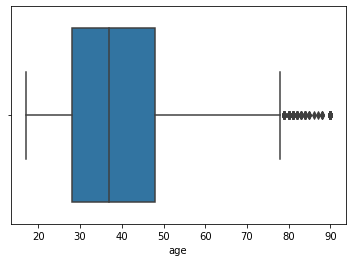

In [11]:
#now let us do some box plots to see to see if there are any outliers in the dataset.
#age is a feature where we can check for outliers as it is continuous and a quantifiable value. 

sns.boxplot(x = adult_dataframe_upd["age"])

In [12]:
#I'm creating age groups and then plotting the number of hours for different age groups. 
min_age = adult_dataframe_upd.loc[:, "age"].min()
max_age = adult_dataframe_upd.loc[:, "age"].max()
adult_dataframe_upd["agegrp"] = pd.cut(adult_dataframe_upd.loc[:, "age"], [min_age, 30, 40, 50, 60, 70, 80, max_age])


/anaconda/envs/azureml_py36/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


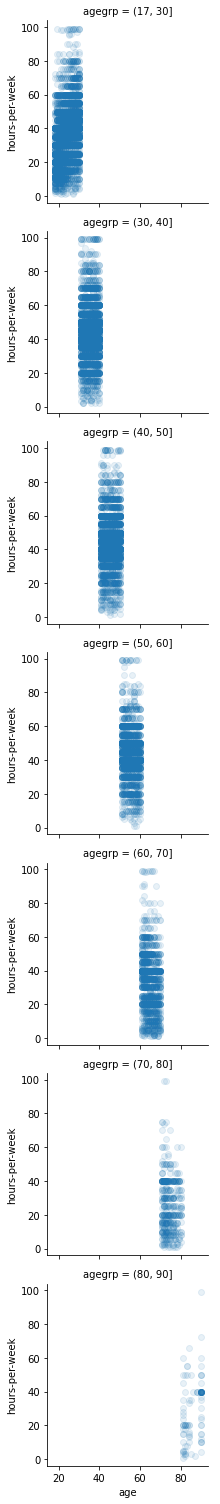

In [13]:
#After creating the age intervals, I am creating the scatter plot
sns.FacetGrid(adult_dataframe_upd, row='agegrp').map(plt.scatter,'age','hours-per-week', alpha=0.1 ).add_legend()

In [14]:
#Now I am seeing how different workclasses are distributed among different age groups 
ws_age_dist = adult_dataframe_upd.groupby(['agegrp'])['workclass'].value_counts().unstack().fillna(0)
ws_age_dist

workclass,?,Federal-gov,Local-gov,Never-worked,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay
agegrp,,,,,,,,,
"(17, 30]",752.0,156.0,416.0,6.0,8023.0,114.0,346.0,345.0,5.0
"(30, 40]",206.0,258.0,540.0,0.0,6250.0,256.0,679.0,354.0,0.0
"(40, 50]",140.0,301.0,630.0,0.0,4514.0,367.0,677.0,347.0,1.0
"(50, 60]",181.0,186.0,342.0,0.0,2516.0,229.0,494.0,179.0,1.0
"(60, 70]",343.0,47.0,123.0,0.0,861.0,108.0,243.0,61.0,6.0
"(70, 80]",128.0,10.0,22.0,0.0,162.0,28.0,81.0,9.0,1.0
"(80, 90]",22.0,1.0,6.0,0.0,47.0,7.0,14.0,1.0,0.0


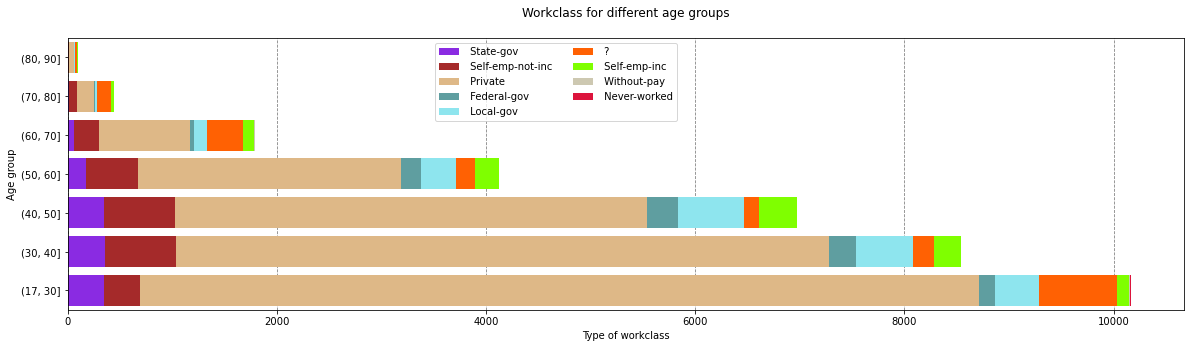

In [15]:
#defining the fields and labels
workclass = adult_dataframe_upd["workclass"].unique()

category_colors_ = ['#8A2BE2', '#A52A2A', '#DEB887', '#5F9EA0', '#8EE5EE', '#FF6103', '#7FFF00', '#CDC8B1', '#DC143C', '#00EEEE', '#B8860B', '#A9A9A9', '#9932CC', '#698B69', '#FF1493']
#for i in range(15)
    #category_colors_.append(colorsys.hsv_to_rgb(i / 30., 1.0, 1.0))
    
age_group = [(17, 30), (30, 40), (40, 50), (50, 60), (60, 70), (70, 80), (80, 90)]   

#figure and axis
fig, ax = plt.subplots(1, figsize=(20, 5))

#plot bars
left = len(ws_age_dist) * [0]
for idx, name in enumerate(workclass):
    plt.barh(ws_age_dist.index.astype(str), ws_age_dist[name], left = left, color=category_colors_[idx])
    left = left + ws_age_dist[name]
    
#title and legends
plt.title('Workclass for different age groups\n')
plt.legend(workclass, bbox_to_anchor=([0.55, 1, 0, 0]), ncol=2, frameon=True)
plt.xlabel('Type of workclass')
plt.ylabel('Age group')

# adjust limits and draw grid lines
plt.ylim(-0.5, ax.get_yticks()[-1] + 0.5)
ax.set_axisbelow(True)
ax.xaxis.grid(color='gray', linestyle='dashed')
plt.show()

In [16]:
#Now let us try to find out which are the occupations that are paid > 50k.  
occ_pay_df = adult_dataframe_upd.groupby(['target '])['occupation'].value_counts().unstack().fillna(0)
#occ_priv_df = occ_priv_df[occ_priv_df.index == (' Private', ' <=50K')]
occ_pay_df

occupation,?,Adm-clerical,Armed-Forces,Craft-repair,Exec-managerial,Farming-fishing,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving
target,,,,,,,,,,,,,,,
<=50K,1652,3261,8,3165,2097,877,1283,1751,3154,146,2278,438,2667,644,1277
>50K,191,507,1,929,1968,115,86,249,137,1,1858,211,983,283,320


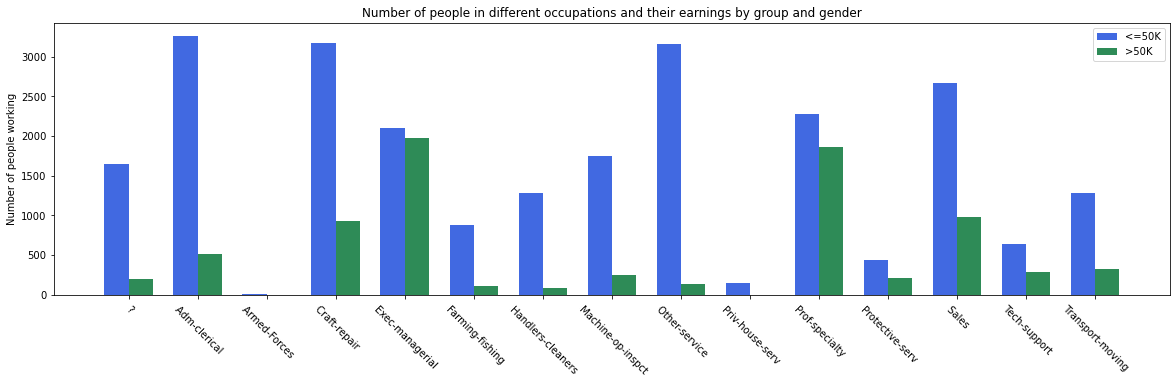

In [17]:
#let us plot a graph for the above figure and see how the salary range is split among different occupations.

width = 0.35       # the width of the bars
fig = plt.figure(figsize=(20, 5))
ax = fig.add_subplot(111)
rects1 = ax.bar(np.arange(len(occ_pay_df.T)), occ_pay_df.iloc[0,:], width, color='royalblue', label = '<=50K')
rects2 = ax.bar(np.arange(len(occ_pay_df.T))+width, occ_pay_df.iloc[1,:], width, color='seagreen', label = '>50K')

ax.set_ylabel('Number of people working')
ax.set_title('Number of people in different occupations and their earnings by group and gender')
ax.set_xticks((np.arange(len(occ_pay_df.T))+ width/2))
ax.set_xticklabels(sorted(adult_dataframe_upd["occupation"].unique()), rotation = -45)
ax.legend()

plt.show()

Now let us verify what age groups dominate these two professions and what workspace these professions belong to. 

In [18]:
work_exec = adult_dataframe_upd.loc[(adult_dataframe_upd['occupation'] == ' Exec-managerial'), 'workclass']
work_exec.value_counts()

 Private             2690
 Self-emp-inc         400
 Self-emp-not-inc     392
 Local-gov            214
 State-gov            189
 Federal-gov          180
Name: workclass, dtype: int64

In [19]:
work_prof = adult_dataframe_upd.loc[(adult_dataframe_upd['occupation'] == ' Prof-specialty'), 'workclass']
work_prof.value_counts()

 Private             2309
 Local-gov            705
 State-gov            414
 Self-emp-not-inc     373
 Federal-gov          175
 Self-emp-inc         160
Name: workclass, dtype: int64

We can clearly see that both the occupations that are highly paid happen to mostly be in the private sector. 
Now let us just verify the age groups of people in these occupations 

In [20]:
exec_agegrp = adult_dataframe_upd.loc[(adult_dataframe_upd['occupation'] == ' Prof-specialty'), 'agegrp']
exec_agegrp.value_counts()

(30, 40]    1215
(40, 50]    1155
(17, 30]     947
(50, 60]     555
(60, 70]     197
(70, 80]      45
(80, 90]      12
Name: agegrp, dtype: int64

In [21]:
prof_agegrp = adult_dataframe_upd.loc[(adult_dataframe_upd['occupation'] == ' Prof-specialty'), 'agegrp']
prof_agegrp.value_counts()

(30, 40]    1215
(40, 50]    1155
(17, 30]     947
(50, 60]     555
(60, 70]     197
(70, 80]      45
(80, 90]      12
Name: agegrp, dtype: int64

It can be seen that the top three age groups that dominate the two high paid professions are (17,50). 
From this we can infer that people in the age group of 17, 30 are dominating the private sectors and the reason could be because there are lot of high paying occupations in private sectors such as Executive managerial or Prof-specialty. 

Now let us check how the salary range is distributed based on different genders. 

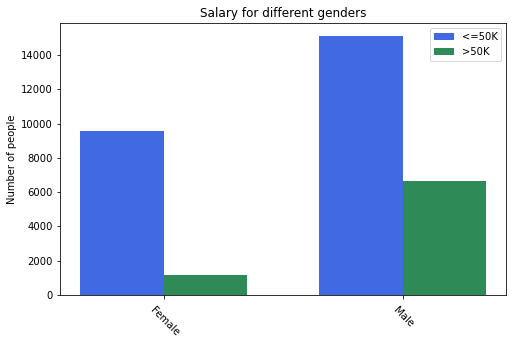

In [22]:
sal_gen_df = adult_dataframe_upd.groupby(["target "])["sex"].value_counts().unstack().fillna(0)

width = 0.35       # the width of the bars
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(111)
rects1 = ax.bar(np.arange(len(sal_gen_df.T)), sal_gen_df.iloc[0,:], width, color='royalblue', label = '<=50K')
rects2 = ax.bar(np.arange(len(sal_gen_df.T))+width, sal_gen_df.iloc[1,:], width, color='seagreen', label = '>50K')

ax.set_ylabel('Number of people')
ax.set_title('Salary for different genders')
ax.set_xticks((np.arange(len(sal_gen_df.T))+ width/2))
ax.set_xticklabels(sorted(adult_dataframe_upd["sex"].unique()), rotation = -45)
ax.legend()

plt.show()

From the above bar graph, there appears to be wage gap for females and males.

In [23]:
gen_workhours = adult_dataframe_upd.groupby(["sex"])["hours-per-week"].mean().fillna(0)
gen_workhours

sex
 Female    36.415257
 Male      42.429667
Name: hours-per-week, dtype: float64

We can see that the average working hours for women is a few hours higher than men. While this could be one of the reasons for wage gap, other factors such as education level and the type of occupation could also be a factor. 

Finally, I will construct a correlation map on the numeric features to find out how the different features are correlated with one another. 

In [24]:
adult_dataframe_upd["education-num"] = adult_dataframe_upd["education-num"].astype(str)

/anaconda/envs/azureml_py36/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


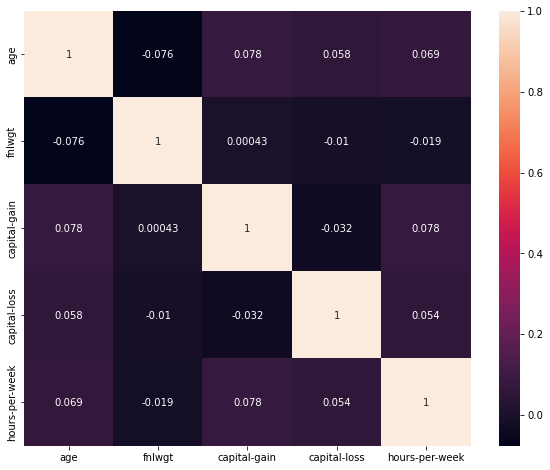

In [25]:
fig = plt.figure(figsize=(10, 8))
cor_matrix = adult_dataframe_upd.corr()
sns.heatmap(cor_matrix, annot=True)
plt.show()


1. The features do not seem to be strongly correlated with one another, but, there are some small trends. 
2. For example, we can see that higher the education, more are the number of hours the person works, and higher is their captial gain. 
3. As expected, capital gain and capital loss seems to be negatively correlated. 

Preprocessing 


Now, I am going to encode all my categorical data so that it is easier to perform algorithms in the future. 

In [7]:
#label encoding for training data
enc = LabelEncoder()
df_datatypes = adult_dataframe_upd.dtypes
df_columns = adult_dataframe_upd.columns
for i in range(len(df_datatypes)):
    if df_datatypes[i] == 'O': 
        enc.fit(adult_dataframe_upd[df_columns[i]])
        adult_dataframe_upd.loc[:,df_columns[i]] = enc.transform(adult_dataframe_upd.loc[:,df_columns[i]])

/anaconda/envs/azureml_py36/lib/python3.6/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [8]:
#now I am doing one-hot encoding 
category_col_1 =['workclass', 'occupation', 'race', 'relationship','native-country:', 'marital-status'] 

adult_dataframe_upd_dummies = pd.get_dummies(adult_dataframe_upd, columns=category_col_1, drop_first=True)

In [9]:
adult_dataframe_upd_dummies

,age,fnlwgt,education,education-num,sex,capital-gain,capital-loss,hours-per-week,target,workclass_1,...,native-country:_38,native-country:_39,native-country:_40,native-country:_41,marital-status_1,marital-status_2,marital-status_3,marital-status_4,marital-status_5,marital-status_6
0,39,77516,9,13,1,2174,0,40,0,0,...,0,1,0,0,0,0,0,1,0,0
1,50,83311,9,13,1,0,0,13,0,0,...,0,1,0,0,0,1,0,0,0,0
2,38,215646,11,9,1,0,0,40,0,0,...,0,1,0,0,0,0,0,0,0,0
3,53,234721,1,7,1,0,0,40,0,0,...,0,1,0,0,0,1,0,0,0,0
4,28,338409,9,13,0,0,0,40,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,257302,7,12,0,0,0,38,0,0,...,0,1,0,0,0,1,0,0,0,0
32557,40,154374,11,9,1,0,0,40,1,0,...,0,1,0,0,0,1,0,0,0,0
32558,58,151910,11,9,0,0,0,40,0,0,...,0,1,0,0,0,0,0,0,0,1
32559,22,201490,11,9,1,0,0,20,0,0,...,0,1,0,0,0,0,0,1,0,0


In [10]:
adult_dataframe_upd_dummies=adult_dataframe_upd_dummies.drop(columns = ['fnlwgt', 'education', 'agegrp'])
adult_dataframe_upd_dummies =adult_dataframe_upd_dummies[[c for c in adult_dataframe_upd_dummies if c not in ['target ']] + ['target ']]

In [31]:
adult_dataframe_upd_dummies

,age,education-num,sex,capital-gain,capital-loss,hours-per-week,workclass_1,workclass_2,workclass_3,workclass_4,...,native-country:_39,native-country:_40,native-country:_41,marital-status_1,marital-status_2,marital-status_3,marital-status_4,marital-status_5,marital-status_6,target
0,39,4,1,2174,0,40,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
1,50,4,1,0,0,13,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,38,15,1,0,0,40,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
3,53,13,1,0,0,40,0,0,0,1,...,1,0,0,0,1,0,0,0,0,0
4,28,4,0,0,0,40,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,3,0,0,0,38,0,0,0,1,...,1,0,0,0,1,0,0,0,0,0
32557,40,15,1,0,0,40,0,0,0,1,...,1,0,0,0,1,0,0,0,0,1
32558,58,15,0,0,0,40,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
32559,22,15,1,0,0,20,0,0,0,1,...,1,0,0,0,0,0,1,0,0,0


Now, I am standardizing all the numeric data to bring everything to one scale so that the results of the model can be better interpreted. 

In [11]:
#standardization 

columns_stand = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
scaler = StandardScaler()
adult_dataframe_upd_dummies[columns_stand] = scaler.fit_transform(adult_dataframe_upd_dummies[columns_stand])


In [33]:
adult_dataframe_upd_dummies

,age,education-num,sex,capital-gain,capital-loss,hours-per-week,workclass_1,workclass_2,workclass_3,workclass_4,...,native-country:_39,native-country:_40,native-country:_41,marital-status_1,marital-status_2,marital-status_3,marital-status_4,marital-status_5,marital-status_6,target
0,0.030390,-0.658756,1,0.148292,-0.216743,-0.035664,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
1,0.836973,-0.658756,1,-0.145975,-0.216743,-2.222483,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,-0.042936,1.214974,1,-0.145975,-0.216743,-0.035664,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
3,1.056950,0.874296,1,-0.145975,-0.216743,-0.035664,0,0,0,1,...,1,0,0,0,1,0,0,0,0,0
4,-0.776193,-0.658756,0,-0.145975,-0.216743,-0.035664,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,-0.849519,-0.829095,0,-0.145975,-0.216743,-0.197650,0,0,0,1,...,1,0,0,0,1,0,0,0,0,0
32557,0.103716,1.214974,1,-0.145975,-0.216743,-0.035664,0,0,0,1,...,1,0,0,0,1,0,0,0,0,1
32558,1.423579,1.214974,0,-0.145975,-0.216743,-0.035664,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
32559,-1.216148,1.214974,1,-0.145975,-0.216743,-1.655530,0,0,0,1,...,1,0,0,0,0,0,1,0,0,0


In [12]:
#Now I am splitting the train dataset
X_train = adult_dataframe_upd_dummies.iloc[:, :-1].values
y_train = adult_dataframe_upd_dummies.loc[:, 'target '].values

In [13]:
#I am reading the test data and doing cleaning and label encoding on it
adult_dataframe_test = pd.read_csv("adulttest.csv")

#checking for null values 
adult_dataframe_test.isna().sum()

#checking for duplicates 
duplicate_rows_df_test = adult_dataframe_test[adult_dataframe_test.duplicated()]
adult_dataframe_test = adult_dataframe_test.drop_duplicates()

In [14]:
#label encoding for test data
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
df_datatypes = adult_dataframe_test.dtypes
df_columns = adult_dataframe_test.columns
for i in range(len(df_datatypes)):
    if df_datatypes[i] == 'O': 
        enc.fit(adult_dataframe_test[df_columns[i]])
        adult_dataframe_test.loc[:,df_columns[i]] = enc.transform(adult_dataframe_test.loc[:,df_columns[i]])

In [40]:
adult_dataframe_test.dtypes 

age                int64
workclass          int64
fnlwgt             int64
education          int64
education-num      int64
marital-status     int64
occupation         int64
relationship       int64
race               int64
sex                int64
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country:    int64
target             int64
dtype: object

In [15]:
#performing one hot encoding
category_col_1 = ['workclass', 'occupation', 'race', 'relationship','native-country:', 'marital-status']

adult_dataframe_test = pd.get_dummies(adult_dataframe_test, columns=category_col_1, drop_first=True)
adult_dataframe_test['native-country:_41'] = 0

In [16]:
adult_dataframe_test=adult_dataframe_test.drop(columns = ['fnlwgt', 'education'])
adult_dataframe_test =adult_dataframe_test[[c for c in adult_dataframe_test if c not in ['target ']] + ['target ']]

In [17]:
#standardization 

columns_stand = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
scaler = StandardScaler()
adult_dataframe_test[columns_stand] = scaler.fit_transform(adult_dataframe_test[columns_stand])

In [95]:
adult_dataframe_test

,age,education-num,sex,capital-gain,capital-loss,hours-per-week,workclass_1,workclass_2,workclass_3,workclass_4,...,native-country:_39,native-country:_40,marital-status_1,marital-status_2,marital-status_3,marital-status_4,marital-status_5,marital-status_6,native-country:_41,target
0,-0.994356,-1.196669,1,-0.142684,-0.218097,-0.031615,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,-0.055664,-0.417699,1,-0.142684,-0.218097,0.769762,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,-0.777734,0.750757,1,-0.142684,-0.218097,-0.031615,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
3,0.377579,-0.028214,1,0.870916,-0.218097,-0.031615,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
4,-1.499805,-0.028214,0,-0.142684,-0.218097,-0.832992,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,0.016543,1.140242,0,-0.142684,-0.218097,-0.352166,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
16277,1.821720,-0.417699,1,-0.142684,-0.218097,-0.031615,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
16278,-0.055664,1.140242,1,-0.142684,-0.218097,0.769762,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
16279,0.377579,1.140242,1,0.576513,-0.218097,-0.031615,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [18]:
#splitting features and targets of the test data
X_test = adult_dataframe_test.iloc[:, :-1].values
y_test = adult_dataframe_test.loc[:, "target "].values

Machine Learning 

MODEL 1: Fully Connected Neural Network 



In [46]:
#defining a validation set
X_train_temp, X_val, y_train_temp, y_val = train_test_split(X_train, y_train, test_size = 0.15, random_state = 0)

In [51]:
#checking one layer validation accuracy 
hidden_layer_ = np.arange(50, 700, 50)
val_1_accuracy = []
for i in hidden_layer_:
    mlp = MLPClassifier(hidden_layer_sizes = (i,), early_stopping = True)
    mlp.fit(X_train_temp,y_train_temp)
    val_1_accuracy.append((mlp.predict(X_val) == y_val).sum()/len(X_val))
    

Text(0.5, 1.0, 'Validation accuracy with 1 hidden layer')

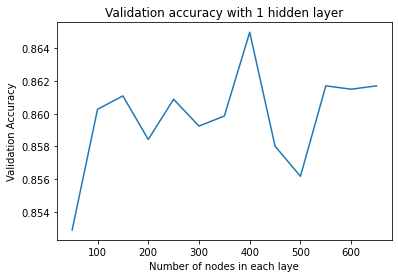

In [52]:
#plotting the curve for one layer 
plt.plot(hidden_layer_, val_1_accuracy)
plt.xlabel("Number of nodes in each laye")
plt.ylabel("Validation Accuracy")
plt.title("Validation accuracy with 1 hidden layer")

In [68]:
val_1_accuracy

[0.8528989961073551,
 0.8602745339069863,
 0.8610940381069453,
 0.8584306494570785,
 0.8608891620569555,
 0.8592501536570375,
 0.8598647818070068,
 0.8649866830567506,
 0.858020897357099,
 0.8561770129071912,
 0.8617086662569146,
 0.8615037902069248,
 0.8617086662569146]

In [67]:
#finding maximum - 400 estimators 
max(val_1_accuracy)

0.8649866830567506

In [53]:
#checking 2 layer validation accuracy 
hidden_layer_ = np.arange(50, 700, 50)
val_2_accuracy = []
for i in hidden_layer_:
    mlp = MLPClassifier(hidden_layer_sizes = (i,i), early_stopping = True)
    mlp.fit(X_train_temp,y_train_temp)
    val_2_accuracy.append((mlp.predict(X_val) == y_val).sum()/len(X_val))

Text(0.5, 1.0, 'Validation accuracy with 2 hidden layers')

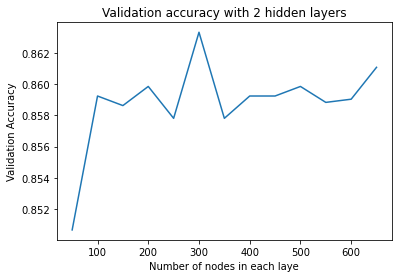

In [54]:
#plotting the curve for 2 layer 
plt.plot(hidden_layer_, val_2_accuracy)
plt.xlabel("Number of nodes in each laye")
plt.ylabel("Validation Accuracy")
plt.title("Validation accuracy with 2 hidden layers")

In [69]:
val_2_accuracy

[0.8506453595574678,
 0.8592501536570375,
 0.8586355255070682,
 0.8598647818070068,
 0.8578160213071092,
 0.8633476746568326,
 0.8578160213071092,
 0.8592501536570375,
 0.8592501536570375,
 0.8598647818070068,
 0.858840401557058,
 0.8590452776070477,
 0.8610940381069453]

In [70]:
#300 nodes 
max(val_2_accuracy)

0.8633476746568326

In [55]:
#checking three layer validation accuracy 
hidden_layer_ = np.arange(50, 700, 50)
val_3_accuracy = []
for i in hidden_layer_:
    mlp = MLPClassifier(hidden_layer_sizes = (i,i,i), early_stopping = True)
    mlp.fit(X_train_temp,y_train_temp)
    val_3_accuracy.append((mlp.predict(X_val) == y_val).sum()/len(X_val))

Text(0.5, 1.0, 'Validation accuracy with 3 hidden layers')

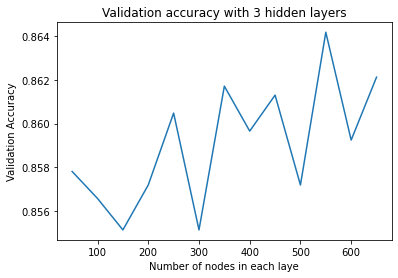

In [56]:
#plotting the curve for three layer 
plt.plot(hidden_layer_, val_3_accuracy)
plt.xlabel("Number of nodes in each laye")
plt.ylabel("Validation Accuracy")
plt.title("Validation accuracy with 3 hidden layers")

In [71]:
val_3_accuracy

[0.8578160213071092,
 0.8565867650071707,
 0.8551526326572424,
 0.85720139315714,
 0.860479409956976,
 0.8551526326572424,
 0.8617086662569146,
 0.859659905757017,
 0.861298914156935,
 0.85720139315714,
 0.8641671788567916,
 0.8592501536570375,
 0.8621184183568941]

In [72]:
max(val_3_accuracy)

0.8641671788567916

In [57]:
#checking the effect of different solvers
#checking three layer validation accuracy 
solvers = ['lbfgs', 'sgd', 'adam']
sol_accuracy = []
for i in solvers:
    mlp = MLPClassifier(hidden_layer_sizes = (), early_stopping = True)
    mlp.fit(X_train_temp,y_train_temp)
    sol_accuracy.append((mlp.predict(X_val) == y_val).sum()/len(X_val)) 


Text(0.5, 1.0, 'Validation accuracy with different solvers')

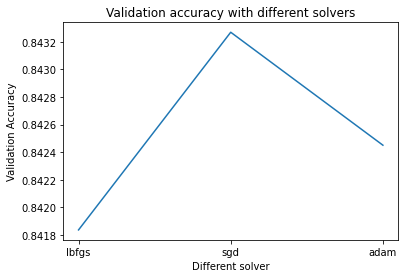

In [58]:
#plotting the curve for different solvers 
plt.plot(solvers, sol_accuracy)
plt.xlabel("Different solver")
plt.ylabel("Validation Accuracy")
plt.title("Validation accuracy with different solvers")

In [77]:
#checking validation accuracy for different values of regularization parameters by keeping sgd as the solver 
regularization_ = [0.000001, 0.00001, 0.0001, 0.001, 0.1]
val_reg_accuracy = []
for i in regularization_:
    mlp = MLPClassifier(hidden_layer_sizes = (400,), solver = 'sgd', early_stopping = True)
    mlp.fit(X_train_temp,y_train_temp)
    val_reg_accuracy.append((mlp.predict(X_val) == y_val).sum()/len(X_val))

Text(0.5, 1.0, 'Validation accuracy with regularization parameters')

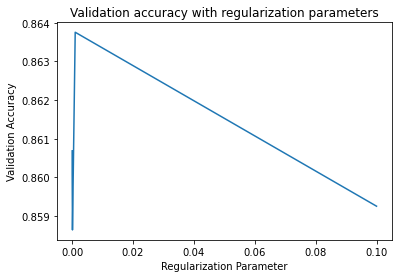

In [76]:
#plotting the curve for regularization parameter 
plt.plot(regularization_, val_reg_accuracy)
plt.xlabel("Regularization Parameter")
plt.ylabel("Validation Accuracy")
plt.title("Validation accuracy with regularization parameters")

In [78]:
val_reg_accuracy

[0.8520794919073961,
 0.8500307314074985,
 0.8490063511575496,
 0.8494161032575291,
 0.8533087482073346]

In [79]:
max(val_reg_accuracy)

0.8533087482073346

In [24]:
#choosing the best model 
MLP_bestmodel = MLPClassifier(hidden_layer_sizes = (300,300), activation = 'relu', solver = 'sgd', alpha = 0.00001, learning_rate = 'constant', random_state=1, max_iter=300)
MLP_bestmodel.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(300, 300), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=300,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='sgd',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [25]:
acc_MLP = (MLP_bestmodel.predict(X_test) == y_test).sum()/len(X_test)
print(f'Accuracy with Nueral Networks: {acc_MLP}')
print("Precision of the model", precision_recall_fscore_support(y_test, MLP_bestmodel.predict(X_test), average='macro')[0])
print("Recall of the model", precision_recall_fscore_support(y_test, MLP_bestmodel.predict(X_test), average='macro')[1])
print("F1 score of the model", precision_recall_fscore_support(y_test, MLP_bestmodel.predict(X_test), average='macro')[2])
print("\nConfusion matrix is\n", confusion_matrix(y_test, MLP_bestmodel.predict(X_test)))

Accuracy with Nueral Networks: 0.8441263209633817
Precision of the model 0.839361045961371
Recall of the model 0.6996246269802522
F1 score of the model 0.7342705865119101

Confusion matrix is
 [[12102   328]
 [ 2209  1637]]


MODEL 2: Logistic Regression 

In [87]:
model = LogisticRegression()
space = dict()
space['solver'] = ['sag', 'lbfgs']
space['penalty'] = ['l2']
space['C'] = [0.00001, 0.0001, 0.001, 0.01, 1, 5, 10]
space['max_iter'] = [5000,10000]

In [88]:
search = GridSearchCV(model, space, scoring = 'accuracy', cv = 5)
result = search.fit(X_train, y_train)
print("Best score is ", result.best_score_)
print("Best parameters are ", result.best_params_)


Best score is  0.8453455401298721
Best parameters are  {'C': 5, 'max_iter': 5000, 'penalty': 'l2', 'solver': 'lbfgs'}


In [19]:
Logistic_model = LogisticRegression(penalty = 'l2', solver = 'lbfgs', C = 5.0, max_iter = 5000, random_state=0)
Logistic_model.fit(X_train, y_train)


LogisticRegression(C=5.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=5000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [26]:
acc_log = (Logistic_model.predict(X_test) == y_test).sum()/len(X_test)
print(f'Accuracy with logistic regression: {acc_log}')
print("Precision of the model", precision_recall_fscore_support(y_test, Logistic_model.predict(X_test), average='macro')[0])
print("Recall of the model", precision_recall_fscore_support(y_test, Logistic_model.predict(X_test), average='macro')[1])
print("F1 score of the model", precision_recall_fscore_support(y_test, Logistic_model.predict(X_test), average='macro')[2])
print("\nConfusion matrix is\n", confusion_matrix(y_test, Logistic_model.predict(X_test)))

Accuracy with logistic regression: 0.8510076185795036
Precision of the model 0.808362551246888
Recall of the model 0.7529701429408745
F1 score of the model 0.7742896739468734

Confusion matrix is
 [[11670   760]
 [ 1665  2181]]
